In [1]:
import numpy as np
import pandas as pd
import bluebelt as blue

In [2]:
frame = pd.read_pickle('../data/frame.pkl')

In [3]:
series = frame.sum(axis=1)
series = series[series.index.isocalendar().year == 2021]
series = series._.not_weekend(drop=True)

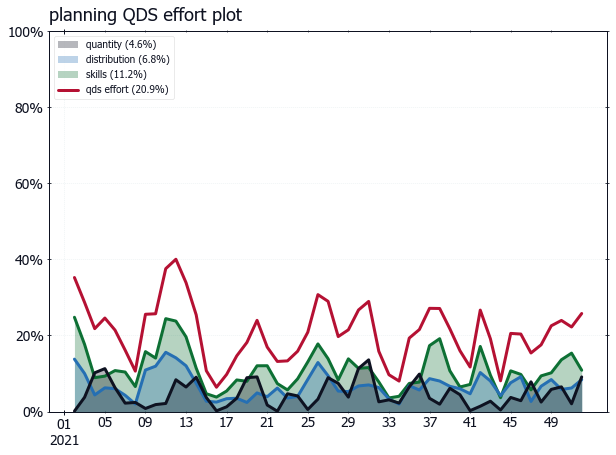

In [10]:
frame[frame.index.isocalendar().year == 2021]._.planning.effort().plot()

In [5]:
blue.style('fat')

In [9]:
blue.config(f'test-{1}')

{'color': '#0e1221'}

RankWarning at 6th degree polynomial
RankWarning at 6th degree polynomial


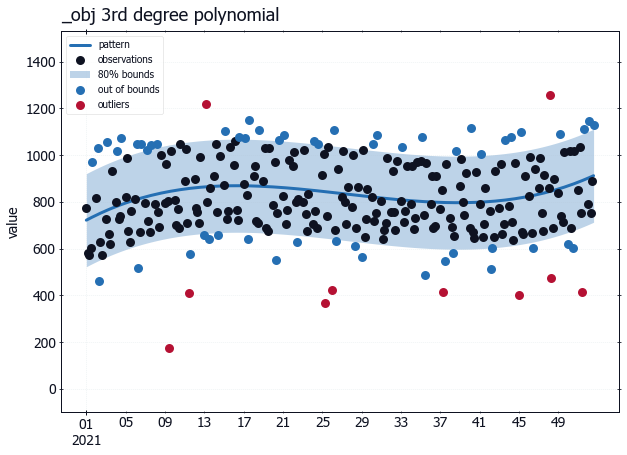

In [18]:
series._.polynomial().plot(residuals=False)

In [5]:
wd = pd.Series(index=pd.MultiIndex.from_frame(series.index.isocalendar()), data=series.values).unstack(level=0)

In [6]:
wd

year             2021
week day             
1    1     774.906778
     2     578.984646
     3     571.787980
     4     604.196839
     5     970.112197
...               ...
52   1     791.895778
     2    1143.747268
     3     753.928266
     4     887.538225
     5    1127.544270

[260 rows x 1 columns]

In [7]:
frame = frame[frame.index.isocalendar().year==2021]

In [8]:
blue.style('paper')

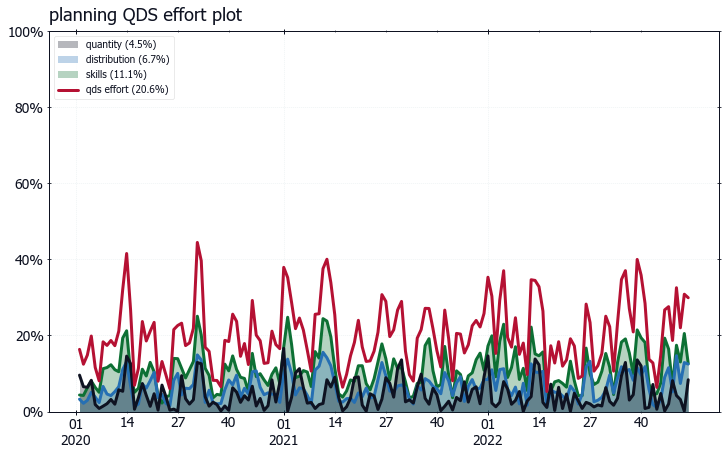

In [16]:
frame._.planning.effort().plot(figsize=(12,7))

In [7]:
group = frame['skill A'].index.isocalendar()[['year', 'week']].apply(tuple, axis=1)

In [9]:
blue.config()

In [5]:
group

2019-12-30     (2020, 1)
2019-12-31     (2020, 1)
2020-01-01     (2020, 1)
2020-01-02     (2020, 1)
2020-01-03     (2020, 1)
                 ...    
2022-12-28    (2022, 52)
2022-12-29    (2022, 52)
2022-12-30    (2022, 52)
2022-12-31    (2022, 52)
2023-01-01    (2022, 52)
Freq: D, Length: 1099, dtype: object

In [6]:
frame['skill A'].groupby(group).sum()

(2020, 1)     685.997531
(2020, 2)     670.893437
(2020, 3)     607.482345
(2020, 4)     508.892603
(2020, 5)     743.900573
                 ...    
(2022, 48)    787.698062
(2022, 49)    775.320456
(2022, 50)    719.142576
(2022, 51)    751.542647
(2022, 52)    660.458725
Name: skill A, Length: 157, dtype: float64

In [3]:
nrows = 105
ncols = 4

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='2019-12-16', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='2019-12-02', periods=nrows), columns=[f'skill {col}' for col in range(1, ncols+1)])

series[series.sample(5).index] = np.nan # break the series
for col in frame.columns:
    frame.at[frame.sample(5).index, col] = np.nan # break the frame

In [7]:
frame._.resample(rule=7).grouped

In [210]:
def adjacent_pairs(groups):
    last = next(groups)
    for this in groups:
        yield (last, this)
        last = this

In [234]:
groups = (group for label, group in frame._.resample(rule=7).grouped)
labels = (label for label, group in frame._.resample(rule=7).grouped)


In [235]:
skills = [0]
for last, this in adjacent_pairs(groups):
    last = pd.DataFrame(index=last.index.isocalendar().day, data=last.fillna(0).values, columns=last.columns)
    this = pd.DataFrame(index=this.index.isocalendar().day, data=this.fillna(0).values, columns=this.columns)
    
    # normalise week totals
    this = this.multiply(last.to_numpy().sum() / this.to_numpy().sum())

    # normalise weekdays
    this = this.multiply((last.sum(axis=1) / this.sum(axis=1)), axis=0)

    # s value is the ratio of half the absolute diff between this and last week and the normalised sum of this week
    skills.append((last - this).abs().to_numpy().sum() / (this.to_numpy().sum() * 2))
    
    
pd.Series(index=labels, data=skills)

2019-12-02    0.000000
2019-12-09    0.129625
2019-12-16    0.229342
2019-12-23    0.167684
2019-12-30    0.140051
2020-01-06    0.144560
2020-01-13    0.156167
2020-01-20    0.137757
2020-01-27    0.145550
2020-02-03    0.184751
2020-02-10    0.200694
2020-02-17    0.165956
2020-02-24    0.125346
2020-03-02    0.208872
2020-03-09    0.169614
dtype: float64

2019-12-02    0.000000
2019-12-09    0.129625
2019-12-16    0.229342
2019-12-23    0.167684
2019-12-30    0.140051
2020-01-06    0.144560
2020-01-13    0.156167
2020-01-20    0.137757
2020-01-27    0.145550
2020-02-03    0.184751
2020-02-10    0.200694
2020-02-17    0.165956
2020-02-24    0.125346
2020-03-02    0.208872
2020-03-09    0.169614
dtype: float64

In [208]:

last = next(groups).fillna(0)
this = next(groups).fillna(0)


last = pd.DataFrame(index=last.index.isocalendar().day, data=last.values, columns=last.columns)
this = pd.DataFrame(index=this.index.isocalendar().day, data=this.values, columns=this.columns)

In [209]:
# normalise week totals
this = this.multiply(last.to_numpy().sum() / this.to_numpy().sum())

# normalise weekdays
this = this.multiply((last.sum(axis=1) / this.sum(axis=1)), axis=0)

# s value is the ratio of half the absolute diff between this and last week and the normalised sum of this week
(last - this).abs().to_numpy().sum() / (this.to_numpy().sum() * 2)

0.12962489077399514

0.12962489077399514

In [156]:
(last.sum(axis=1) / this.sum(axis=1))

day
1    0.883233
2    1.332344
3    0.873507
4    1.065383
5    0.631513
6    1.210809
7    0.875640
dtype: float64

In [67]:
for last_week, this_week in adjacent_pairs(groups):
    print(f'last: {last_week.index[0]}, this: {this_week.index[0]}')

last: 2019-12-02 00:00:00, this: 2019-12-09 00:00:00
last: 2019-12-09 00:00:00, this: 2019-12-16 00:00:00
last: 2019-12-16 00:00:00, this: 2019-12-23 00:00:00
last: 2019-12-23 00:00:00, this: 2019-12-30 00:00:00
last: 2019-12-30 00:00:00, this: 2020-01-06 00:00:00
last: 2020-01-06 00:00:00, this: 2020-01-13 00:00:00
last: 2020-01-13 00:00:00, this: 2020-01-20 00:00:00
last: 2020-01-20 00:00:00, this: 2020-01-27 00:00:00
last: 2020-01-27 00:00:00, this: 2020-02-03 00:00:00
last: 2020-02-03 00:00:00, this: 2020-02-10 00:00:00
last: 2020-02-10 00:00:00, this: 2020-02-17 00:00:00
last: 2020-02-17 00:00:00, this: 2020-02-24 00:00:00
last: 2020-02-24 00:00:00, this: 2020-03-02 00:00:00
last: 2020-03-02 00:00:00, this: 2020-03-09 00:00:00


In [8]:
series._.workdays()

NameError: name 'series' is not defined

In [176]:
s2 = series[12:]

In [250]:
def _get_origin(_obj, rule):
    if (rule / datetime.timedelta(days=7)).is_integer():
        days = int(((_obj.index.isocalendar().week[0]-1) * 7) + _obj.index[0].weekday())
        return _obj.index[0] - datetime.timedelta(days=days)
    elif (rule / datetime.timedelta(days=1)).is_integer():
        days = int(_obj.index[0].weekday())
        return _obj.index[0] - datetime.timedelta(days=days)
    else:
        return 'start_day'
    

def _get_rule(rule):
    if isinstance(rule, str):
        rule = rule.replace(" ", "").lower()
        unit = rule.lstrip('0123456789')
        count = int(rule[0:len(rule)-len(unit)]) if len(rule) > len(unit) else 1
        if unit in {'μs', 'microsecond', 'microseconds'}:
            return datetime.timedelta(microseconds=count)
        if unit in {'ms', 'millisecond', 'milliseconds'}:
            return datetime.timedelta(milliseconds=count)
        if unit in {'s', 'sec', 'second', 'seconds'}:
            return datetime.timedelta(seconds=count)
        if unit in {'m', 'min', 'minute', 'minutes'}:
            return datetime.timedelta(minutes=count)
        if unit in {'h', 'hr', 'hrs', 'hour', 'hours'}:
            return datetime.timedelta(hours=count)
        if unit in {'d', 'day','days'}:
            return datetime.timedelta(days=count)
        if unit in {'w', 'wk', 'week', 'weeks'}:
            return datetime.timedelta(weeks=count)
    elif isinstance(rule, int):
        return datetime.timedelta(days=rule)
    else:
        return rule
    

In [245]:
s2.resample(rule=datetime.timedelta(days=1), origin=_get_origin(s2, rule=_get_rule('1d'))).sum()

2020-01-11     31.327838
2020-01-12      4.493085
2020-01-13    135.274150
2020-01-14    127.002800
2020-01-15     93.767587
                 ...    
2022-12-28     96.117546
2022-12-29    127.471070
2022-12-30    197.066827
2022-12-31     42.500659
2023-01-01      6.417912
Freq: D, Name: skill A, Length: 1087, dtype: float64

In [21]:
s2.index[0] + datetime.timedelta(days=-s2.index[0].weekday())

Timestamp('2019-12-30 00:00:00', freq='D')

In [20]:
s2.index[0].weekday()

2

In [13]:
frame._.resample(7).subseries(3,8)

,skill A,skill B,skill C,skill D
2019-12-30,28.0,22.0,51.0,73.0
2020-01-06,27.0,21.0,52.0,68.0
2020-01-13,25.0,18.0,50.0,65.0
2020-01-20,21.0,19.0,55.0,70.0
2020-01-27,30.0,14.0,58.0,78.0
...,...,...,...,...
2022-11-28,32.0,27.0,64.0,87.0
2022-12-05,32.0,28.0,46.0,71.0
2022-12-12,29.0,20.0,63.0,63.0
2022-12-19,31.0,26.0,59.0,71.0
